<a href="https://colab.research.google.com/github/JonathanBoada/JonathanBoada/blob/main/notebooks/0_Capstone_PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install --upgrade scipy
from scipy.stats import mannwhitneyu
!pip install dexplot
import dexplot as dxp

     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 173 kB 13.9 MB/s 


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CapstoneDeidentifiedv3.csv to CapstoneDeidentifiedv3.csv


In [ ]:
df1 = pd.read_csv('CapstoneDeidentifiedv3.csv')

In [ ]:
#df.info()

In [ ]:
#maps the values to numbers
#fill blanks
#converts it into categorical data

def preprocess(df, label):
    Str2IntDict={"0":0,"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"10":10,
                 "Never": 1, "Sometimes":2, "Usually":3, "Always":4, 
                 "No":0, "Yes":1,  "Unchecked":0, "Checked":1, 
                 "Own home":1,"Another home":2,"Another facility":3,
                 "Definitely no":1, "Probably no":2, "Probably yes":3, "Definitely yes":4, 
                 "10-Best possible":10, "0-Worst possible":0, 
                 "Poor":1, "Fair":2, "Good":3, "Very Good":4, "Excellent":5, 
                 "Strongly disagree":1,"Disagree":2,"Agree":3,"Strongly agree":4, "Not given meds": -1}

    temp=df[label].map(Str2IntDict)
    temp=temp.fillna(temp.median())
    temp=pd.Categorical(temp, ordered=True)

    return temp

In [ ]:
old_labels=['RateHospitalCMS23', 'RecommendHospitalCMS24',
            'NursesTreatCourtesyRespectCMS1','NursesListenCarefullyCMS2', 'NursesExplainYouUnderstandCMS3',
            'DoctorsTreatCourtesyRespectCMS6', 'DoctorsListenCarefullyCMS7','DoctorsExplainYouUnderstandCMS8', 
            'CleanlinessHospitalEnvironmentCMS10','QuietnessHospitalEnvironmentCMS11', 'HospitalStaffTookPrefIntoAccountCMS38', 
            'NeverPressedCallButtonCMS34', 'CallButtonHelpSoonAsWantedCMS37',
            'NeedHelpBathroomBedpanCMS12','HelpToiletingSoonAsWantedCMS13', 
            'GivenMedicineNotTakenBeforeCMS18','TellYouWhatNewMedicineForCMS33',
            'StaffDescribeMedicineSideEffectCMS19', 'UnderstoodPurposeTakingMedsCMS40',
            'InforRegardingSymptomsProblemsLookForCMS22', 'GoodUnderstandingManagingHealthCMS39',
            'StaffTalkAboutHelpWhenLeftCMS21',  'AdmittedThroughEmergencyRoomCMS41',
            'LeftHospitalDestinationCMS20','RateOverallHealthCMS25','RateMentalEmotionalHealthCMS26',]

new_labels=['RateHospital', 'RecommendHospital',
       'NursesTreat', 'NursesListen', 'NursesExplain', 'DoctorsTreat',
       'DoctorsListen', 'DoctorsExplain', 'Cleanliness', 'Quietness',
       'Preferences', 'CallButtonY/N', 'CallButtonSoon', 'BathroomY/N',
       'HelpToilet', 'NewMedicineY/N', 'NewMedicineFor', 'MedicineSideEffect',
       'UnderstandMeds', 'InfoSymptomsY/N', 'UnderstandHealth',
       'StaffTalkAboutHelpWhenLeftY/N', 'AdmittedThroughER',
       'DischargeDestination', 'RateHealth', 'RateMentalHealth']

In [ ]:
df = pd.DataFrame()

df['ID']=df1['ID']
df['comments']=df1['TransportJobRequirements']
df['HasComment'] = np.where(df['comments'].isna(), 0, 1)
df['HasComment'] = pd.Categorical(df['HasComment'], ordered=True)

for i,j in zip(new_labels, old_labels):
    df[i]=preprocess(df1,j)

In [ ]:
df.describe(include='all')

,ID,comments,HasComment,RateHospital,RecommendHospital,NursesTreat,NursesListen,NursesExplain,DoctorsTreat,DoctorsListen,...,NewMedicineFor,MedicineSideEffect,UnderstandMeds,InfoSymptomsY/N,UnderstandHealth,StaffTalkAboutHelpWhenLeftY/N,AdmittedThroughER,DischargeDestination,RateHealth,RateMentalHealth
count,6116.000000,3729,6116.0,6116.0,6116.0,6116.0,6116.0,6116.0,6116.0,6116.0,...,6116.0,6116.0,6116.0,6116.0,6116.0,6116.0,6116.0,6116.0,6116.0,6116.0
unique,NaN,3524,2.0,11.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,5.0,2.0,4.0,2.0,2.0,3.0,5.0,5.0
top,NaN,good,1.0,10.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,3.0,4.0,1.0,3.0,1.0,1.0,1.0,3.0,4.0
freq,NaN,66,3729.0,2596.0,4094.0,5003.0,4324.0,4258.0,4936.0,4325.0,...,4832.0,2760.0,2743.0,5342.0,2969.0,4725.0,4780.0,5676.0,2370.0,2164.0
mean,3058.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1765.681455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1529.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3058.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4587.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
temp=df.loc[:, df.columns!='comments']
df_long = pd.melt(temp, "ID", var_name="label", value_name="value")

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


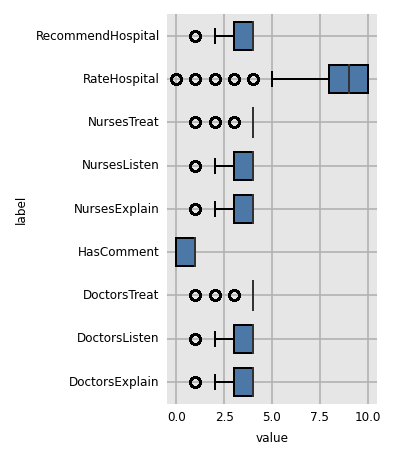

In [ ]:
dxp.box(x='value', y='label', data=df_long[:55044], orientation='h')

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


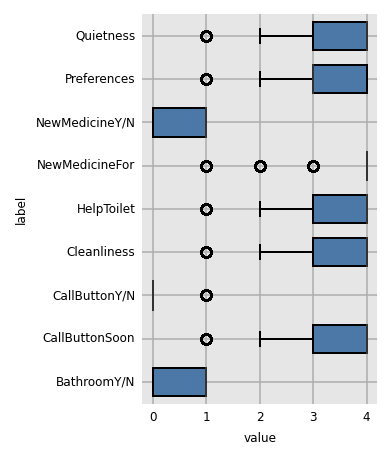

In [ ]:
dxp.box(x='value', y='label', data=df_long[55044:110088 ], orientation='h')

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


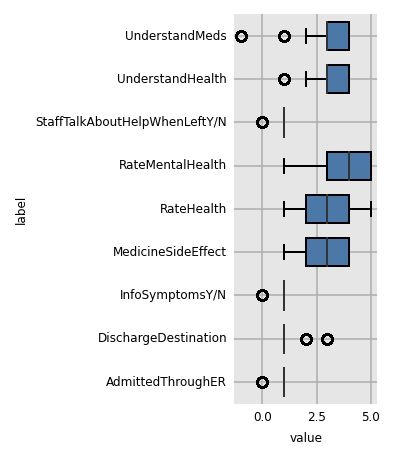

In [ ]:
dxp.box(x='value', y='label', data=df_long[110088:], orientation='h')

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


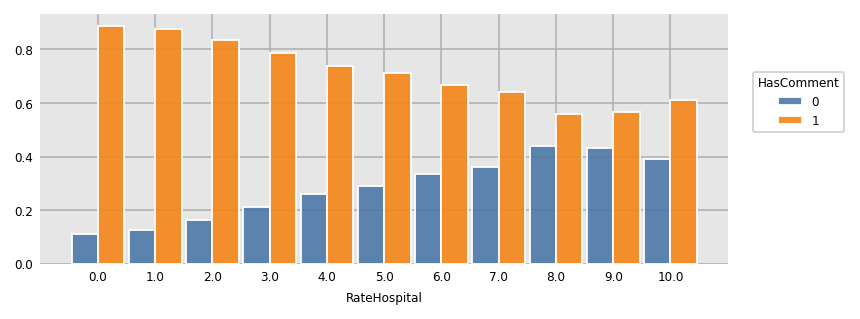

In [ ]:
dxp.count('RateHospital', data=df, split='HasComment', normalize='RateHospital')


/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


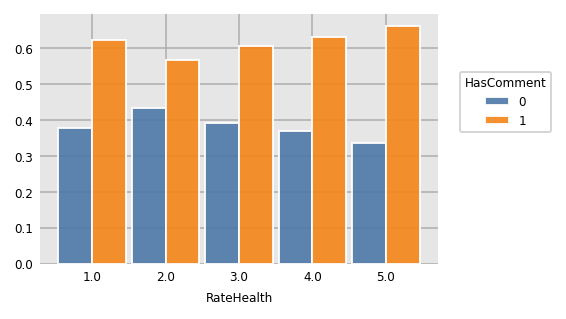

In [ ]:
dxp.count('RateHealth', data=df, split='HasComment', normalize='RateHealth')


In [ ]:
#A small p-value means that the distributions are different 
#so we can conclude that there is indeed a difference between 
#the surveys that have a comment and the ones that don't

NursesY=df.NursesListen[df['HasComment']==1]
NursesN=df.NursesListen[df['HasComment']==0]
res = mannwhitneyu(NursesY, NursesN, alternative="less")
print(res)


MannwhitneyuResult(statistic=4306626.5, pvalue=0.0036793810572156188)


In [ ]:
#A small p-value means that the distributions are different 
#so we can conclude that there is indeed a difference between 
#the surveys that have a comment and the ones that don't

RateY=df.RateHospital[df['HasComment']==1]
RateN=df.RateHospital[df['HasComment']==0]
res = mannwhitneyu(RateY, RateN, alternative="less")
print(res)

MannwhitneyuResult(statistic=4233177.5, pvalue=0.00035096072883137436)


In [ ]:
#A small p-value means that the distributions are different 
#so we can conclude that there is indeed a difference between 
#the surveys that have a comment and the ones that don't

ERY=df.AdmittedThroughER[df['HasComment']==1]
ERN=df.AdmittedThroughER[df['HasComment']==0]
res = mannwhitneyu(ERY, ERN, alternative="less")
print(res)

MannwhitneyuResult(statistic=4366697.5, pvalue=0.04096033497754328)


In [ ]:
#A small p-value means that the distributions are different 
#so we can conclude that there is indeed a difference between 
#the surveys that have a comment and the ones that don't

ERY=df.RateHealth[df['HasComment']==1]
ERN=df.RateHealth[df['HasComment']==0]
res = mannwhitneyu(ERY, ERN, alternative="greater")
print(res)

MannwhitneyuResult(statistic=4698656.5, pvalue=5.9862799109628455e-05)


In [ ]:
#Split the dataset
'''
train=df.sample(frac=0.75,random_state=200) #random state is seed value
test=df.drop(train.index)
validation=test.sample(frac=0.5,random_state=200)
test=test.drop(validation.index)

print(df.shape)
print(train.shape)
print(test.shape)
print(validation.shape)
'''

#download the dataset
'''
df.to_csv(r'All.csv', index = False)
train.to_csv(r'train.csv', index = False)
test.to_csv(r'test.csv', index = False)
validation.to_csv(r'validation.csv', index = False)
'''

"\n#df.to_csv(r'All.csv', index = False)\ntrain.to_csv(r'train.csv', index = False)\ntest.to_csv(r'test.csv', index = False)\nvalidation.to_csv(r'validation.csv', index = False)\n"

In [ ]:
df.shape

(3729, 29)

In [ ]:
df.dropna(subset=['comments'], inplace=True)

In [ ]:
#Some comments had duplicate words and extra spaces
comments_strip = df['comments'].str.strip()
comments_splited = comments_strip.str.rsplit()

comments_joinedback=[]
for i in comments_splited:
    temp=i[0]
    for j in range(1, len(i)):
        if i[j]!=i[j-1]:
            temp+=" "+i[j]

    comments_joinedback.append(temp)

df['comments']=comments_joinedback

In [ ]:
df.shape

(3729, 29)

In [ ]:
df.to_csv(r'capstone_preprocessed.csv', index = False)